In [24]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [25]:
# Load the data into a pandas DataFrame
file_path = 'rolling_stones_spotify.csv'  # Make sure this is the correct path to your CSV file
data = pd.read_csv(file_path)

In [26]:
# Check for duplicates
duplicates = data.duplicated().sum()
print(f'Number of duplicate entries: {duplicates}')

# Check for missing values in each column
missing_values = data.isnull().sum()
print('Missing values per column:')
print(missing_values)

# If duplicates or missing values are found, handle them accordingly
# For example, to drop duplicates:
if duplicates > 0:
    data = data.drop_duplicates()

# To fill missing values, you can use:
data.fillna(method='ffill', inplace=True)  # Forward fill

Number of duplicate entries: 0
Missing values per column:
Unnamed: 0          0
name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64


/var/folders/zp/4tjbhw890w98m51tpslwdf4c0000gn/T/ipykernel_87419/3397728145.py:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Forward fill


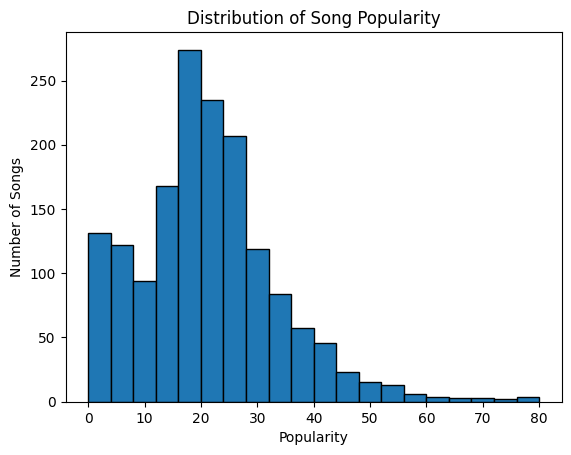

In [27]:
# For simplicity, let's check the distribution of song popularity
plt.hist(data['popularity'], bins=20, edgecolor='black')
plt.title('Distribution of Song Popularity')
plt.xlabel('Popularity')
plt.ylabel('Number of Songs')
plt.show()


In [28]:
# Describe the data to get some statistical insights
print(data.describe())

        Unnamed: 0  track_number  acousticness  danceability       energy  \
count  1610.000000   1610.000000   1610.000000   1610.000000  1610.000000   
mean    804.500000      8.613665      0.250475      0.468860     0.792352   
std     464.911282      6.560220      0.227397      0.141775     0.179886   
min       0.000000      1.000000      0.000009      0.104000     0.141000   
25%     402.250000      4.000000      0.058350      0.362250     0.674000   
50%     804.500000      7.000000      0.183000      0.458000     0.848500   
75%    1206.750000     11.000000      0.403750      0.578000     0.945000   
max    1609.000000     47.000000      0.994000      0.887000     0.999000   

       instrumentalness    liveness     loudness  speechiness        tempo  \
count       1610.000000  1610.00000  1610.000000  1610.000000  1610.000000   
mean           0.164170     0.49173    -6.971615     0.069512   126.082033   
std            0.276249     0.34910     2.994003     0.051631    29.2334

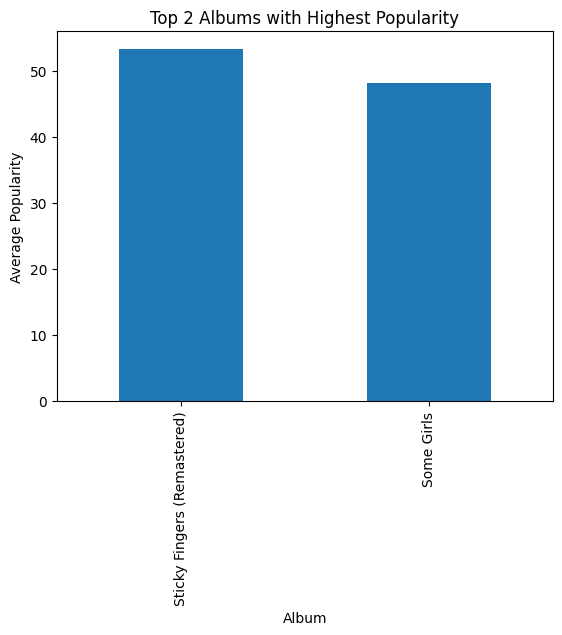

In [29]:
# Feature engineering: Add a column for song popularity category
data['popularity_category'] = pd.cut(data['popularity'], bins=[-1, 25, 50, 75, 100], labels=['Low', 'Medium', 'High', 'Very High'])

# Exploratory Data Analysis
# Visualization: Album recommendations
album_popularity = data.groupby('album')['popularity'].mean().sort_values(ascending=False).head(2)
album_popularity.plot(kind='bar', xlabel='Album', ylabel='Average Popularity', title='Top 2 Albums with Highest Popularity')
plt.show()

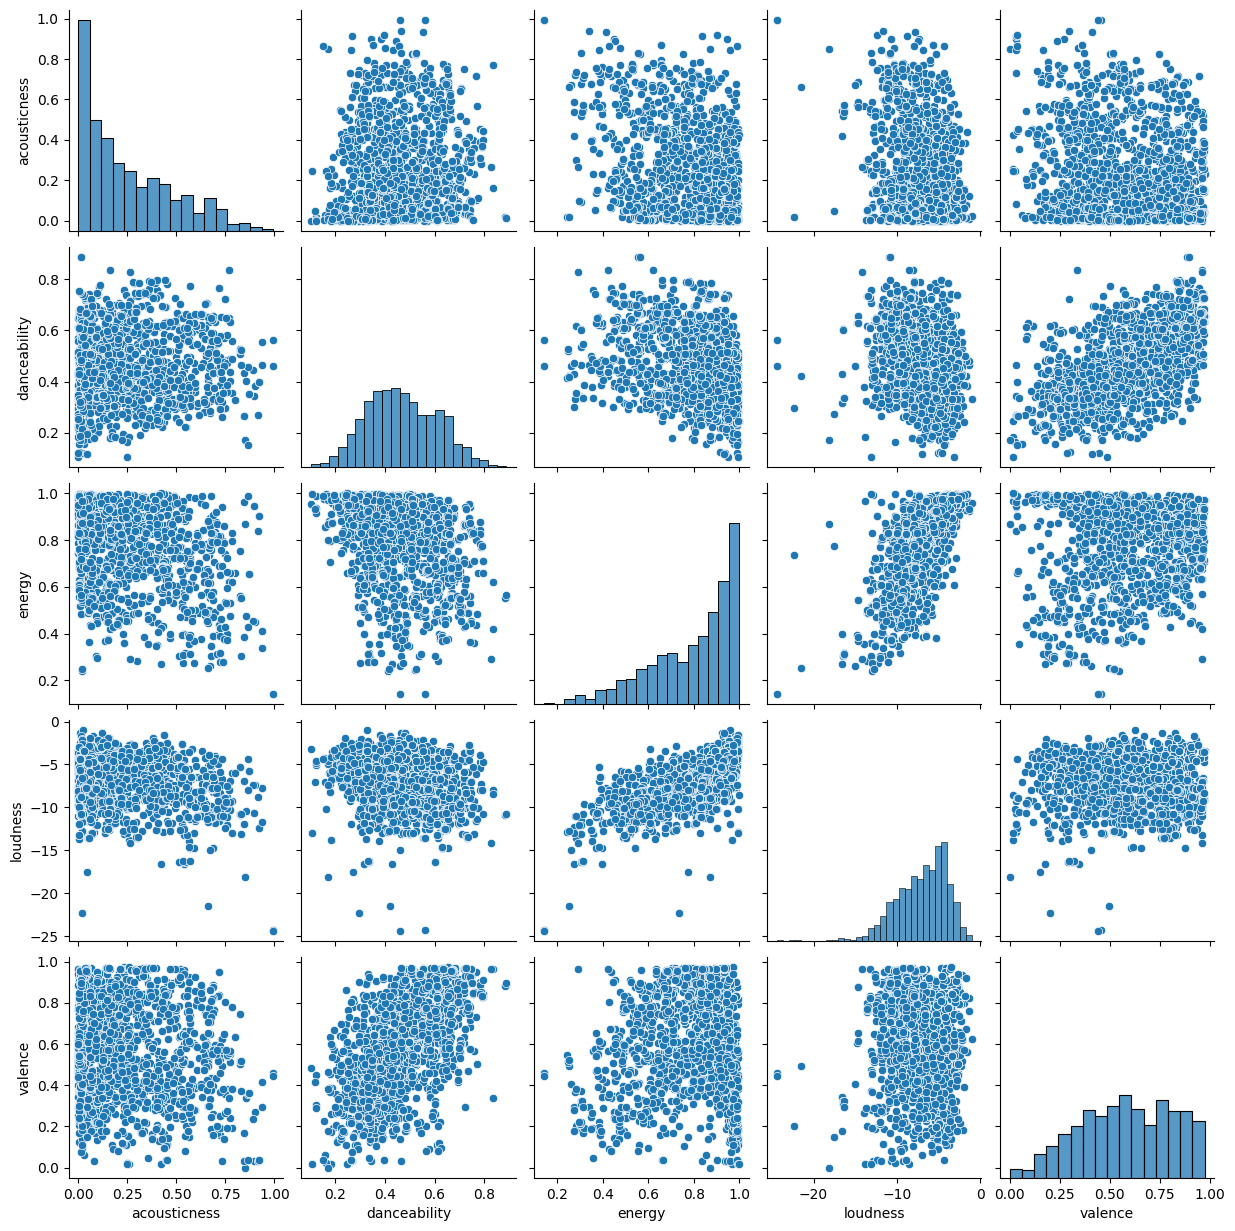

In [30]:
# Visualizations for individual features
sns.pairplot(data[['acousticness', 'danceability', 'energy', 'loudness', 'valence']])
plt.show()

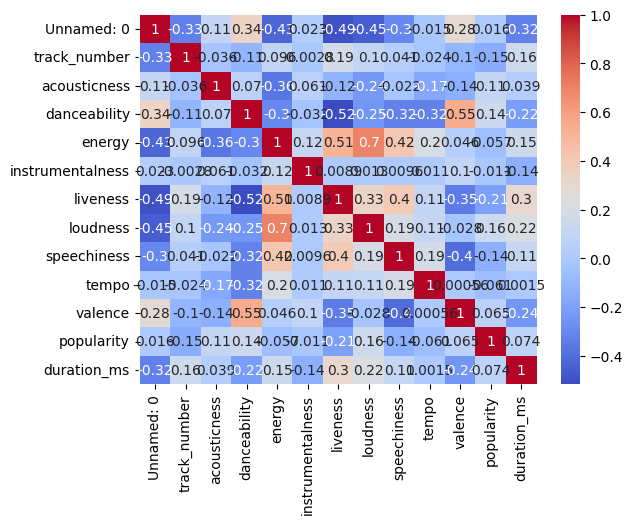

In [31]:
# Select only numeric columns for the correlation matrix
numeric_data = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

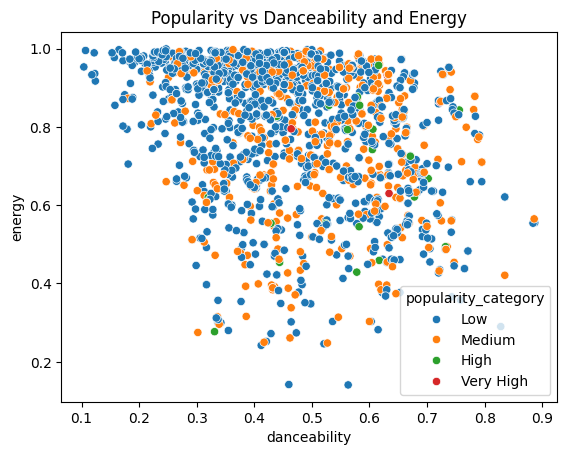

In [32]:
# Popularity analysis
sns.scatterplot(x='danceability', y='energy', hue='popularity_category', data=data)
plt.title('Popularity vs Danceability and Energy')
plt.show()

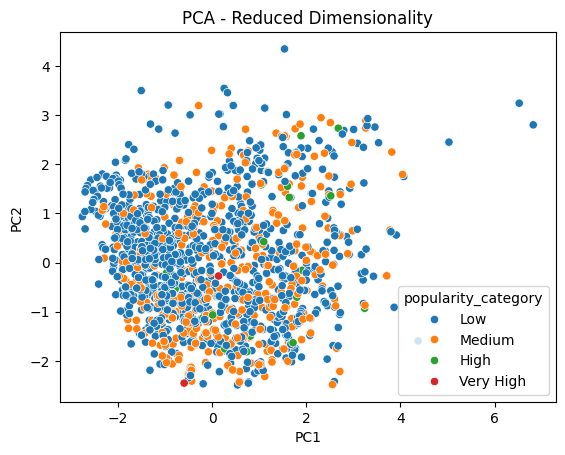

In [33]:
# Dimensionality reduction using PCA
features_for_pca = data[['acousticness', 'danceability', 'energy', 'loudness', 'valence']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_pca)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
sns.scatterplot(x='PC1', y='PC2', hue=data['popularity_category'], data=df_pca)
plt.title('PCA - Reduced Dimensionality')
plt.show()

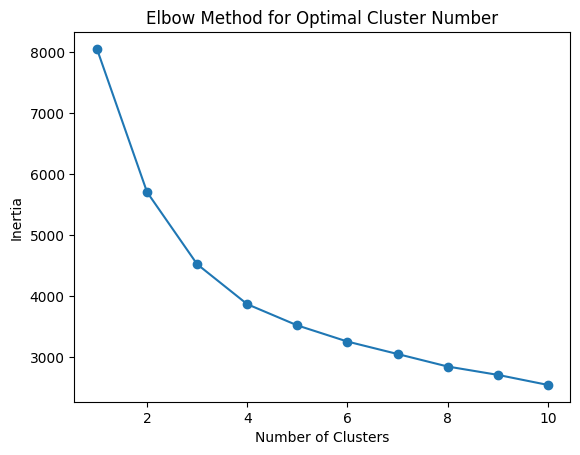

In [34]:
# Cluster Analysis
# Determine the optimal number of clusters using the Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Cluster Number')
plt.show()

In [35]:
# Based on Elbow Method, choose the optimal number of clusters (e.g., k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(scaled_features)

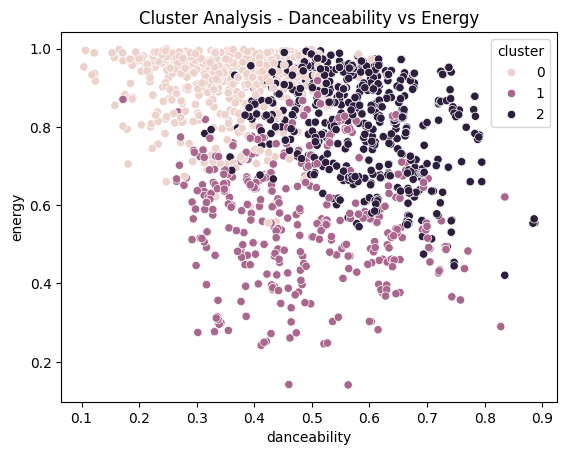

In [36]:
# Visualize clusters
sns.scatterplot(x='danceability', y='energy', hue='cluster', data=data)
plt.title('Cluster Analysis - Danceability vs Energy')
plt.show()